### TITANIC SURVIVAL PREDICTION
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

## Importing the necessary tools


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
def wrangle(filepath):
  #importing dataset
  df=pd.read_csv(filepath)

  #Droping "Cabin" columns because it has 77% of missing values
  df.drop(columns=["Cabin"],inplace=True)

  #Dropping columns with high or low cardinality
  df.drop(columns=["PassengerId"],inplace=True)

  #Filling the missing values
  df['Age'] = df['Age'].fillna(df['Age'].median())
  df['Embarked'] = df['Embarked'].fillna('S')

  #Function for title
  def fun(name):
      if "Mr." in name:
        return "Mr"
      elif "Mrs." in name:
        return "Mrs"
      elif "Miss" in name:
        return "Miss"
      elif "Dr" in name:
        return "Dr"
      elif "Master" in name:
        return "Master"
      else:
        return "Others"

  #Applying this function to the "Name" columns
  df["Name"]=df["Name"].apply(fun)

 #Renaming name column to title
  df.rename(columns={"Name": "Title"},inplace=True)

  #Combining "SibSp" and "Parch" in one columns
  #family sizes
  df['Fsize'] =  df['Parch'] + df['SibSp'] + 1

  #Drop "Parch" and "SibSp" columns
  df.drop(columns=['Parch','SibSp',"Ticket"],inplace=True)
  #Dropping duplicates rows

  df.drop_duplicates(inplace=True)
  #Removing outliers for "Fare" columns
  # # low, high = df["Fare"].quantile([0.0, 0.95])
  # fare = df["Fare"].between(low, high)
  # df = df[fare]
  #No multicollinearity
  return df


In [17]:
df=wrangle("/content/drive/MyDrive/Titanic-Dataset.csv")

In [18]:
data=df.drop(columns=["Survived"],axis=1)
corr=data.corr().abs()

<ipython-input-18-96284b461972>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().abs()


In [19]:
corr

,Pclass,Age,Fare,Fsize
Pclass,1.000000,0.342560,0.553020,0.082835
Age,0.342560,1.000000,0.092348,0.276834
Fare,0.553020,0.092348,1.000000,0.194093
Fsize,0.082835,0.276834,0.194093,1.000000


<Axes: >

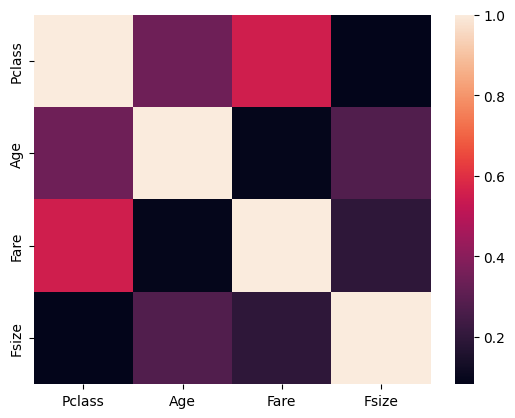

In [20]:
sns.heatmap(corr)

In [21]:
df.describe()

,Survived,Pclass,Age,Fare,Fsize
count,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.413572,2.248399,29.578003,34.779593,1.956466
std,0.492789,0.851703,13.716013,52.252241,1.552715
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,1.000000,22.000000,8.050000,1.000000
50%,0.000000,3.000000,28.000000,15.850000,1.000000
75%,1.000000,3.000000,36.000000,34.020800,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


## Explatory Data Analysis


### Univariate Analysis

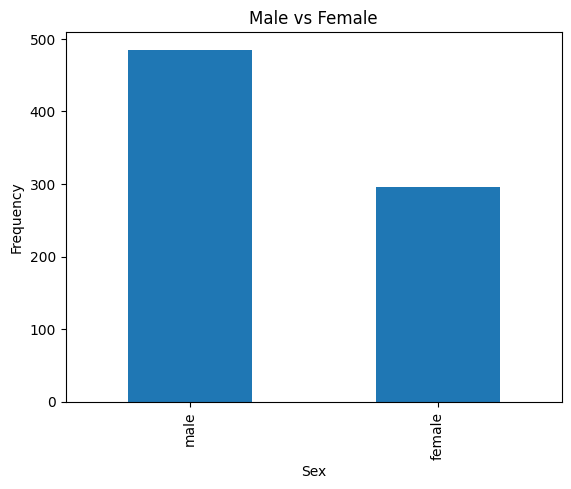

In [22]:
#The portion of male and Females
df["Sex"].value_counts().plot(kind="bar",xlabel='Sex',ylabel="Frequency",title="Male vs Female");

- **The population of men was higher than that of
 female**

In [23]:
#Survivers and Non_survivers
survival=df["Survived"].value_counts().reset_index()
survival

,index,Survived
0,0,458
1,1,323


Text(0.5, 0, 'Survival')

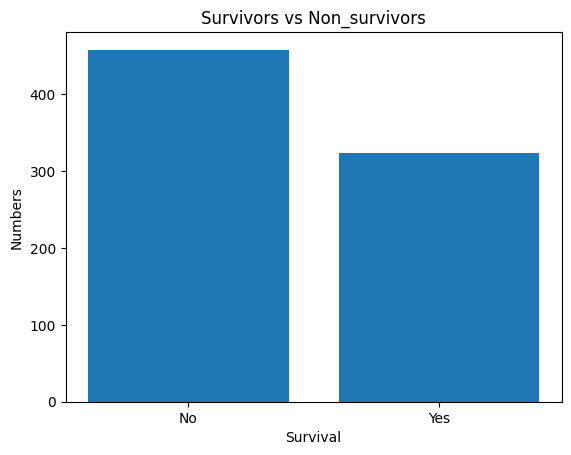

In [24]:
plt.bar(x=['No',"Yes"],height=survival["Survived"])
plt.title("Survivors vs Non_survivors");
plt.ylabel("Numbers")
plt.xlabel("Survival")

- **Survival rate was low compared to death rate**

In [25]:
#Passenger Classes
classes=df["Pclass"].value_counts().reset_index()

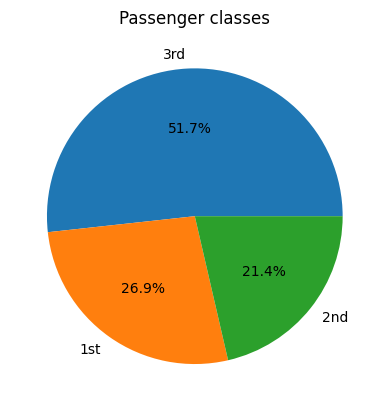

In [26]:
plt.pie(x=classes["Pclass"], labels=["3rd", "1st", "2nd"], autopct="%1.1f%%")
plt.title("Passenger classes");


- **Half of the population was in the 3rd class**

In [27]:
embark=df["Embarked"].value_counts().reset_index()

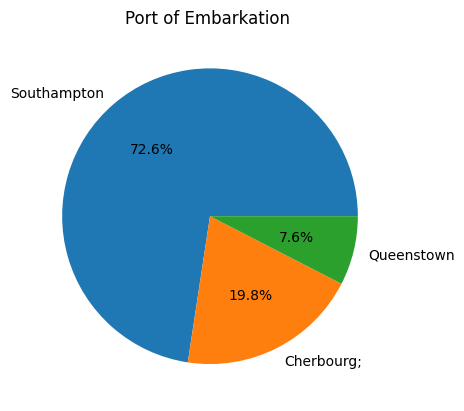

In [28]:
#Embarkation
plt.pie(x=embark["Embarked"], labels=["Southampton", "Cherbourg;", "Queenstown"], autopct="%1.1f%%")
plt.title("Port of Embarkation ");


- **Almost three-quarter of the population embarked Southampton**

In [29]:
title=df["Title"].value_counts().reset_index()

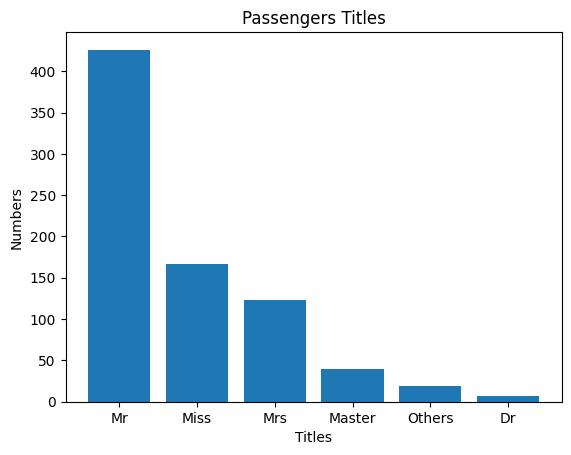

In [30]:
plt.bar(x=title["index"],height=title["Title"]);
plt.title("Passengers Titles")
plt.ylabel("Numbers")
plt.xlabel("Titles");

- **Half of the population were passengers with Mr. title**

In [31]:
family=df["Fsize"].value_counts()

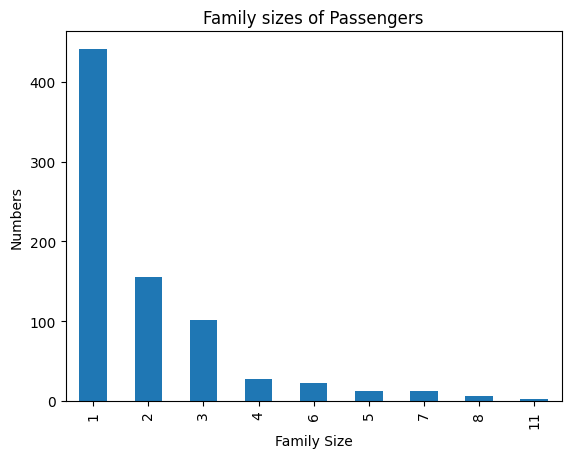

In [32]:
family.plot(kind="bar",xlabel="Family Size",ylabel="Numbers",title='Family sizes of Passengers');

- **Most of the passengers consisted Individuals**

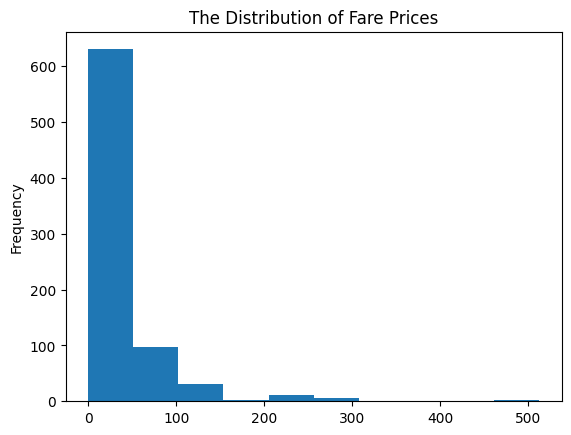

In [33]:
df["Fare"].plot(kind="hist",xlabel="Fare",title="The Distribution of Fare Prices",);

- **most Fare prices were ranged between 0 and 100**

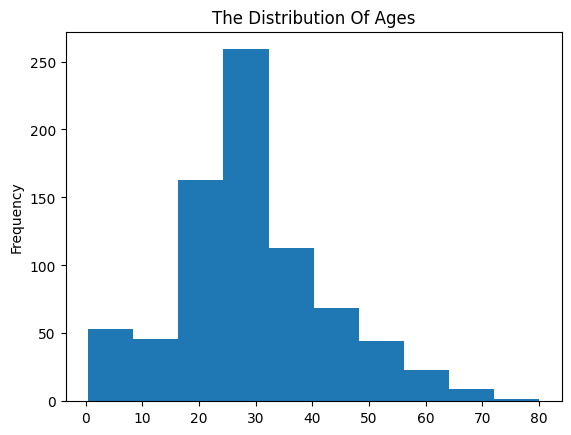

In [34]:
df["Age"].plot(kind="hist", xlabel="Ages", title="The Distribution Of Ages",);

- **Most of the passengers were people aged between 20 and 40 ages**

### Bivariate Data Analysis

In [35]:
SBS=pd.crosstab(df["Sex"],df["Survived"])

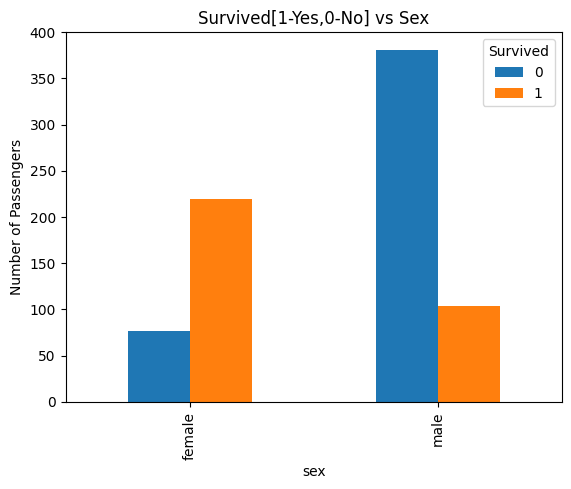

In [36]:
SBS.plot(kind="bar",ylabel="Number of Passengers",xlabel="sex",title="Survived[1-Yes,0-No] vs Sex");

- **Almost 3/4 of the female population survived while more than 3/4 of male population dead**

In [37]:
SBE=pd.crosstab(df["Embarked"],df["Survived"])

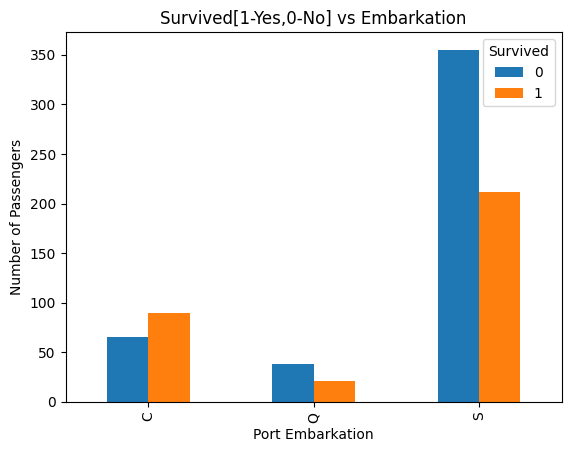

In [38]:
SBE.plot(kind="bar",ylabel="Number of Passengers",xlabel="Port Embarkation",title="Survived[1-Yes,0-No] vs Embarkation");

- **More than half of passengers who embarked port C survived**
- **Almost 2/3 of passengers who embarked at port Q dead**
- **37% of passengers who embarked at port S survived**

In [39]:
SBC=pd.crosstab(df["Pclass"],df["Survived"])

In [40]:
SBC

Survived,0,1
Pclass,,
1,77,133
2,82,85
3,299,105


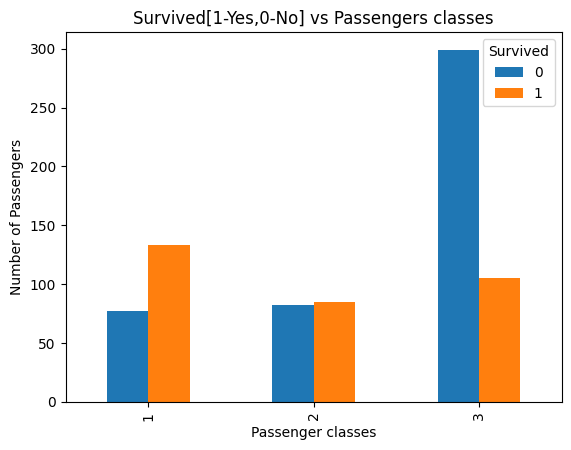

In [41]:
SBC.plot(kind="bar",ylabel="Number of Passengers",xlabel="Passenger classes",title="Survived[1-Yes,0-No] vs Passengers classes");

- **Almost 2/3 of passengers in the 1st class Survived**
- **Half of passengers in the 2nd class Survived**
- **Almost 1/4 of passengers in the 3st class Survived**

In [42]:
SBT=pd.crosstab(df["Title"],df["Survived"])

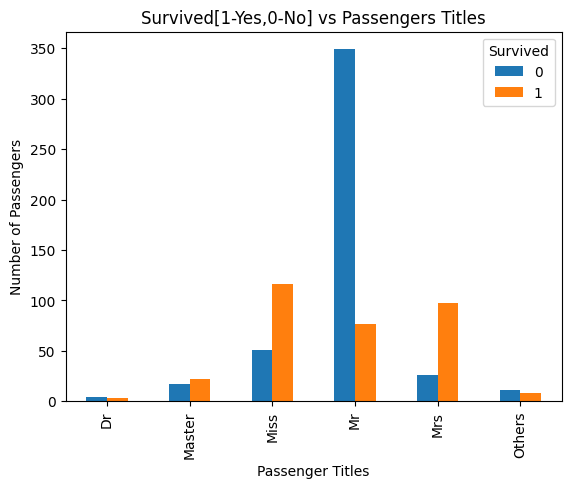

In [43]:
SBT.plot(kind="bar",ylabel="Number of Passengers",xlabel="Passenger Titles",title="Survived[1-Yes,0-No] vs Passengers Titles");

- **Most of passengers with title "mr" dead, while most of the passengers with titles "Miss" and "Mrs" Survived**

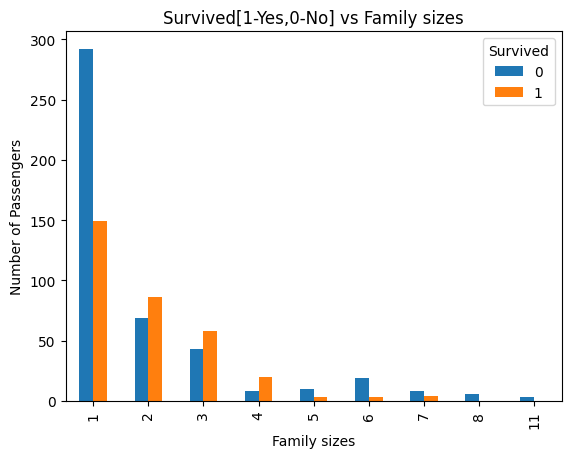

In [44]:
SBF=pd.crosstab(df["Fsize"],df["Survived"])
SBF.plot(kind="bar",ylabel="Number of Passengers",xlabel="Family sizes",title="Survived[1-Yes,0-No] vs Family sizes");

**Most of the passengers with family sizes of 2 and 3 survived (Most probably they were couples and children)**

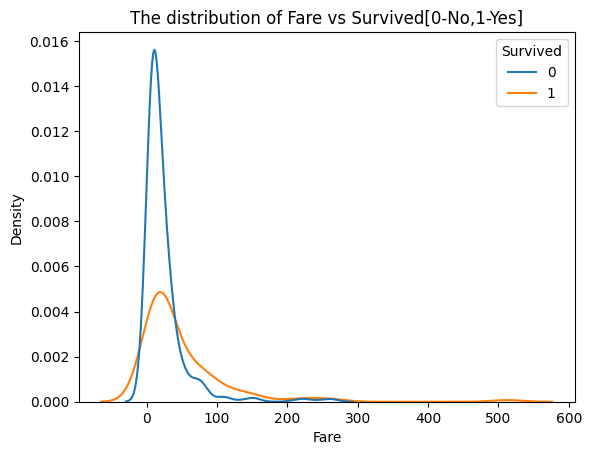

In [45]:
sns.kdeplot(df,x="Fare",hue="Survived")
plt.title("The distribution of Fare vs Survived[0-No,1-Yes]");

- **Passengers who paid higher Fare from(100-600) survived , while those who paid fare between 0 and 50 , most of them died**

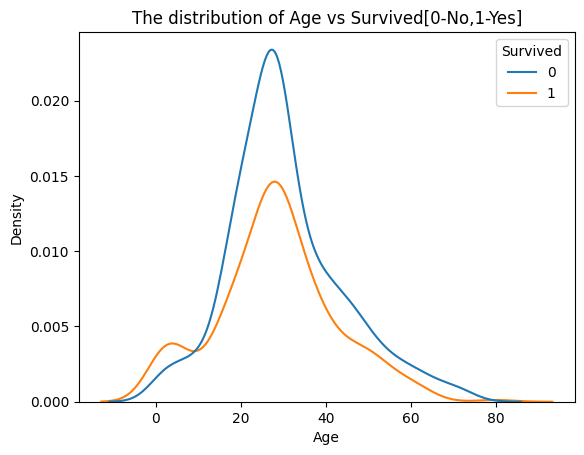

In [46]:
sns.kdeplot(df,x="Age",hue="Survived")
plt.title("The distribution of Age vs Survived[0-No,1-Yes]");

- **Most of the passengers below age 10 survived and those age above 80 aswell survived**

## Preprocessing


In [47]:
#split the data into "Features" and "Target"
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#Splitting the data into train and test dataset
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.15,random_state=432,shuffle=True)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((663, 7), (118, 7), (663,), (118,))

In [51]:
#converting categorial dataset into numericals and scaling
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
le=LabelEncoder()
OneHot=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
scaler=MinMaxScaler()



In [52]:
#Trainsforming "Title"  and "Fsize"columns for train dataset and
#test dataset using label encoder
X_train[["Fsize","Title"]]=X_train[["Fsize","Title"]].apply(le.fit_transform)
X_test[["Fsize","Title"]]=X_test[["Fsize","Title"]].apply(le.fit_transform)


In [53]:
#Trainsforming "Sex" ,"Embarked" and "Pclass"columns for train dataset and
#test dataset using OneHot encoder

categorical_cols=["Sex","Embarked","Pclass"]
# Create the transformer
transformer = ColumnTransformer([("OneHot", OneHotEncoder(), categorical_cols)],
                                remainder="passthrough")

# Fit the transformer on the training data
transformer.fit(X_train)

# Transform the training and test data
transformed_train = transformer.transform(X_train)
transformed_test = transformer.transform(X_test)

# Convert the transformed data back to DataFrames
X_train = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())
X_test = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())





In [54]:
X_train.head()

,OneHot__Sex_female,OneHot__Sex_male,OneHot__Embarked_C,OneHot__Embarked_Q,OneHot__Embarked_S,OneHot__Pclass_1,OneHot__Pclass_2,OneHot__Pclass_3,remainder__Title,remainder__Age,remainder__Fare,remainder__Fsize
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,28.0,14.5000,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,24.0,79.2000,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,38.0,227.5250,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,16.0,18.0000,2.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,41.5792,3.0


In [55]:
X_test.shape,   X_train.shape

((118, 12), (663, 12))

In [56]:
#A function for Renaming Columns by removing ("Onehot__" and "remainder__") from columns
def Rename(data):
  for i in data.columns:
    data=data.rename(columns={i: i.split('__')[1]})
  return data

In [57]:
X_train=Rename(X_train)
X_test=Rename(X_test)


In [58]:
X_train.head(3)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title,Age,Fare,Fsize
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,28.0,14.500,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,24.0,79.200,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,38.0,227.525,0.0


In [59]:
X_test.head(3)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title,Age,Fare,Fsize
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,36.0,26.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,62.0,80.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,46.9,6.0


In [60]:
X_test.shape,   X_train.shape

((118, 12), (663, 12))

In [61]:
##Scaling "Age" and "Fare" in the range(0,1)
X_train[["Age","Fare"]] = scaler.fit_transform(X_train[["Age","Fare"]])
X_test[["Age","Fare"]] = scaler.fit_transform(X_test[["Age","Fare"]])

## Modeling

In [62]:
#importing Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "svc":SVC(),
          "tree": DecisionTreeClassifier(),
          "gnb":GaussianNB()
          }
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [65]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7711864406779662,
 'KNN': 0.847457627118644,
 'Random Forest': 0.8135593220338984,
 'svc': 0.8135593220338984,
 'tree': 0.7796610169491526,
 'gnb': 0.7288135593220338}

In [66]:
model_comparison=pd.DataFrame(model_scores,index=["accuracy"])

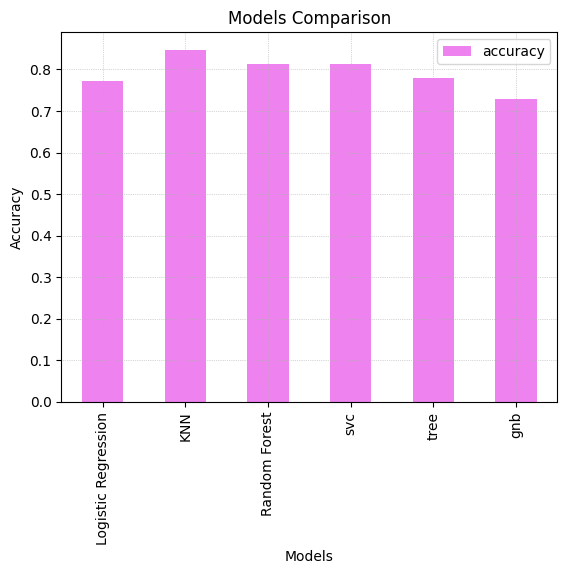

In [67]:
model_comparison.T.plot.bar(xlabel="Models",ylabel="Accuracy",title="Models Comparison",color="violet");
plt.grid(linestyle=":",linewidth=.5)

In [68]:
#From Visualisation The best performing model is Knn, Followed by Random forest and Svc

## Model Evaluation

In [69]:
np.random.seed(42)
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

# Metrics
def evaluate(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

KNN_metrics = evaluate(y_test, knn_preds)
rf_metrics = evaluate(y_test, rf_preds)
svc_metrics = evaluate(y_test, svc_preds)

print("KNeighbours Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*KNN_metrics))
print("Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))
print("SVM Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*svc_metrics))

KNeighbours Metrics - Accuracy: 0.847457627118644, Precision: 0.8492999263080324, Recall: 0.847457627118644, F1-score: 0.8461041011835831
Random Forest Metrics - Accuracy: 0.8135593220338984, Precision: 0.8230117340286832, Recall: 0.8135593220338984, F1-score: 0.809168508965856
SVM Metrics - Accuracy: 0.8135593220338984, Precision: 0.813160518444666, Recall: 0.8135593220338984, F1-score: 0.8131228205929476


## Hyperparameter Tuning

In [70]:
##Hyperparameter Tuning  Knn
from sklearn.model_selection import KFold,GridSearchCV

kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 19}


In [71]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 77.97%


In [72]:
##Hyperparameter RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [73]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [74]:
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': None}

In [75]:
rs_rf.score(X_test, y_test)

0.8305084745762712

In [76]:
y_pred=rs_rf.predict(X_test)

In [77]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [78]:
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.8305084745762712, Precision: 0.8809523809523809, Recall: 0.7115384615384616, F1: 0.7872340425531914


##Testing

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [80]:
cm=confusion_matrix(y_test,y_pred)

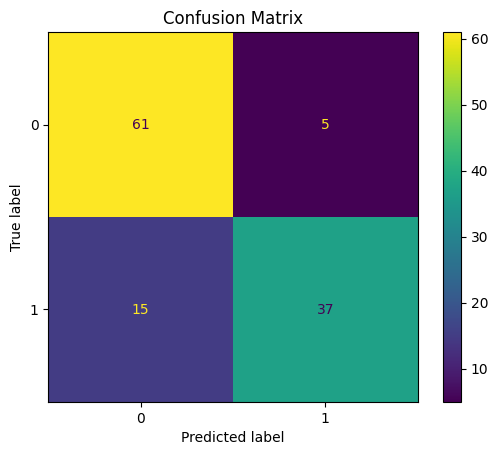

In [81]:
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix");